In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns




In [9]:
atlantic_df = pd.read_csv('./data/Atlantic_League_Data_1_18_2024.csv')
central_df = pd.read_csv('./data/Central_League_Data_1_18_2024.csv')
metro_df = pd.read_csv('./data/Metro_League_Data_1_18_2024.csv')
pacific_df = pd.read_csv('./data/Pacific_League_Data_1_18_2024.csv')

df = pd.concat([atlantic_df, central_df, metro_df, pacific_df]).reset_index(drop=True)


df = df.drop(columns=['Unnamed: 0'])


In [10]:
df.shape

(630, 34)

/home/toomeh/miniconda3/envs/nhl_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/toomeh/miniconda3/envs/nhl_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/toomeh/miniconda3/envs/nhl_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


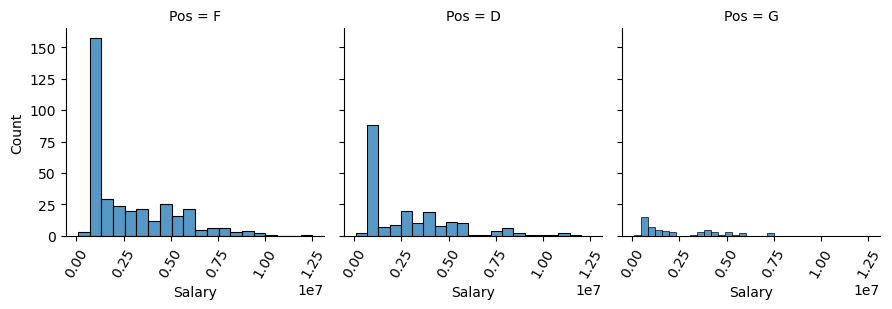

In [11]:
g = sns.FacetGrid(df, col='Pos')
g.map(sns.histplot, 'Salary', bins=20)
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=60)

There appears to be a huge spike just under 1e6, lets take a look 

In [15]:
low_salary_sorted = df[df['Salary'] < 1.2e6].sort_values(by='Salary')


In [16]:
low_salary_sorted.head()

,Player,Pos,Age,Ht,Wt,S/C,Exp,Salary,GP,G,...,ATOI,OPS,DPS,PS,BLK,HIT,FOW,FOL,FO%,Team
616,Magnus Chrona,G,23,NaN,NaN,NaN,0,70000.0,2,0,...,25:15,0.0,0.0,-0.4,0,0,0,0,NaN,SJS
299,Louis Crevier,D,22,NaN,NaN,NaN,0,80000.0,13,0,...,16:09,0.0,0.0,0.1,28,11,0,0,NaN,CHI
126,Jiri Kulich,F,19,6-1,186.0,L/-,0,82500.0,1,0,...,14:53,0.0,0.0,-0.1,0,0,0,1,0.0,BUF
410,Ivan Miroshnichenko,F,19,NaN,NaN,NaN,0,82500.0,4,0,...,10:23,-0.1,-0.1,-0.2,1,6,0,1,0.0,WSH
499,Byron Froese,F,32,NaN,NaN,NaN,5,475000.0,1,0,...,8:22,0.0,0.0,0.0,0,2,3,3,50.0,VEG


These salaries dont match a few google searches...

may need to extract salary data from cap friendly 


There are other issues in this data. I would love center vs wing labels
S/C needs to be parsed 